In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Cleaning

### Import libraries

Let's first load required libraries:

In [ ]:
# We Will Import the Libraries that we need.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

In [ ]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


Let's download the dataset


Context:


Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.


The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content:


The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.


- sex: 1 for female and 2 for male.

- age: of the patient.


- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.


- patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.


- pneumonia: whether the patient already have air sacs inflammation or not.


- pregnancy: whether the patient is pregnant or not.


- diabetes: whether the patient has diabetes or not.


- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.


- asthma: whether the patient has asthma or not.


- inmsupr: whether the patient is immunosuppressed or not.


- hypertension: whether the patient has hypertension or not.


- cardiovascular: whether the patient has heart or blood vessels related disease.


- renal chronic: whether the patient has chronic renal disease or not.


- other disease: whether the patient has other disease or not.


- obesity: whether the patient is obese or not.


- tobacco: whether the patient is a tobacco user.


- usmr: Indicates whether the patient treated medical units of the first, second or third level.


- medical unit: type of institution of the National Health System that provided the care.


- intubed: whether the patient was connected to the ventilator.


- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.


- date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

### Upload The Data

In [ ]:
# We will import the file from the Exil (spreadsheet).
dat = pd.read_csv("/content/drive/MyDrive/CSV files/Covid Data.csv")
dat

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### look at the data

In [ ]:
# Take a look at the head of the data.
dat.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [ ]:
# Take a look at the tail of the data.
dat.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
# Take a look at the form (shape) of the data (Dimensions of Dataset).
dat.shape

(1048575, 21)

In [ ]:
# Look at the columns names.
dat.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [ ]:
dat.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573     True
1048574    False
Length: 1048575, dtype: bool

In [ ]:
# We are looking for duplicate rows.
dat.duplicated().sum()

812049

In [ ]:
dat.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

**Use the .info() method to find out how many entries there are.**

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
# We are looking for types of the columns in the data.
dat.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [ ]:
# To know and see the number of components or the number of sample of each column in this data.
dat.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

### Data Tuning and Initialization

#### Remove tha Duplicated Rows

We removed the repeating rows, so as not to affect the model build to work with the data, but kept one row of them.

In [ ]:
gt = dat.drop_duplicates(keep='last')

In [ ]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
# Take a look at the form (shape) of the data (Dimensions of Dataset)  after tuning.
gt.shape

(236526, 21)

#### Tuning For the CLASIFFICATION_FINAL Column

In [ ]:
gt.CLASIFFICATION_FINAL.value_counts()

3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
# covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 
# 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
gt["CLASIFFICATION_FINAL"] = [2 if each>=4 else 1 for each in gt.CLASIFFICATION_FINAL]

In [ ]:
gt.CLASIFFICATION_FINAL.value_counts()

2    123238
1    113288
Name: CLASIFFICATION_FINAL, dtype: int64

In [ ]:
gt["CLASIFFICATION_FINAL"] = [0 if each>=2 else 1 for each in gt.CLASIFFICATION_FINAL]

In [ ]:
gt.CLASIFFICATION_FINAL.value_counts()

0    123238
1    113288
Name: CLASIFFICATION_FINAL, dtype: int64

#### Define missing data

##### For the DATE_DIED Column

If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [ ]:
gt.DATE_DIED.value_counts()

9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [ ]:
#convert date_died to died or not, 2 for alive 1 for dead

gt["DEATH"] = [0 if each=="9999-99-99" else 1 for each in gt.DATE_DIED]

In [ ]:
#drop DATE_DIED column
gt.drop(columns="DATE_DIED", inplace=True)

In [ ]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,51,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,55,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,28,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt.DEATH.value_counts()

0    160561
1     75965
Name: DEATH, dtype: int64

##### For the AGE Column

In [ ]:
gt.AGE.value_counts()

56     5047
60     4909
59     4878
57     4854
55     4802
       ... 
118       2
115       2
111       1
121       1
113       1
Name: AGE, Length: 121, dtype: int64

In [ ]:
#Create a column for ptients >60 years and <60 years.
gt['AGE'] = [0 if each < 54 else 1 for each in gt['AGE']]

In [ ]:
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt.AGE.value_counts()

1    120048
0    116478
Name: AGE, dtype: int64

#### Tuning in general

##### Drop All Missing Value

In [ ]:
# Drop All Missing Value.
gt = gt[(gt.PNEUMONIA == 1) | (gt.PNEUMONIA == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.DIABETES == 1) | (gt.DIABETES == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.COPD == 1) | (gt.COPD == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.ASTHMA == 1) | (gt.ASTHMA == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.INMSUPR == 1) | (gt.INMSUPR == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.HIPERTENSION == 1) | (gt.HIPERTENSION == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.OTHER_DISEASE == 1) | (gt.OTHER_DISEASE == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.CARDIOVASCULAR == 1) | (gt.CARDIOVASCULAR == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.OBESITY == 1) | (gt.OBESITY == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.RENAL_CHRONIC == 1) | (gt.RENAL_CHRONIC == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
gt = gt[(gt.TOBACCO == 1) | (gt.TOBACCO == 2)]
gt

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


##### Drop  columns

we will Drop this columns because it have many of the data, and It will affect data quality.

In [ ]:
dr = gt.copy()
dr

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,97,1,1,2,2,2,...,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,97,1,1,97,2,2,...,2,1,2,2,1,1,2,0,97,1
2,2,1,2,2,1,2,1,97,1,2,...,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,97,2,0,2,2,2,...,2,2,2,2,2,2,2,0,97,1
4,2,1,2,1,97,2,1,97,1,2,...,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,2,2,0,97,2,2,...,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,97,2,1,97,2,2,...,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,97,2,0,97,2,2,...,2,2,2,2,2,2,2,0,97,0


In [ ]:
dr.ICU.value_counts()

2     113136
97     92390
1      14961
99      2168
Name: ICU, dtype: int64

In [ ]:
dr.PREGNANT.value_counts()

97    122462
2      95888
1       2788
98      1517
Name: PREGNANT, dtype: int64

In [ ]:
dr.INTUBED.value_counts()

2     96566
97    92390
1     31675
99     2024
Name: INTUBED, dtype: int64

In [ ]:
dr.drop(['ICU','PREGNANT','INTUBED','MEDICAL_UNIT'], inplace= True, axis=1)
dr

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,2,2,2,2,1,2,2,2,2,2,1,1
1,2,2,1,1,1,2,2,2,2,1,2,2,1,1,2,0,1
2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1,1
3,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,0,1
4,2,2,1,2,1,1,2,2,2,1,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0,0
1048571,1,2,2,2,0,2,2,2,2,1,2,2,2,2,2,0,0
1048572,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,0,0
1048573,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0,0


## Splite The Data Into Train & Test & Validation

### Define dependant & independant

In [ ]:
x_dr = dr.drop(['DEATH'],axis=1)
y_dr = dr['DEATH']

In [ ]:
x_dr

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,2,2,2,2,1,2,2,2,2,2,1
1,2,2,1,1,1,2,2,2,2,1,2,2,1,1,2,0
2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
3,2,1,1,2,0,2,2,2,2,2,2,2,2,2,2,0
4,2,2,1,2,1,1,2,2,2,1,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0
1048571,1,2,2,2,0,2,2,2,2,1,2,2,2,2,2,0
1048572,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,0
1048573,2,2,1,2,0,2,2,2,2,2,2,2,2,2,2,0


### Splite the data into Train & Test

In [ ]:
drx_train, drx_test, dry_train, dry_test = train_test_split(x_dr, y_dr, test_size=0.2, random_state=42)

In [ ]:
drx_train.shape, drx_test.shape, dry_train.shape, dry_test.shape

((178124, 16), (44531, 16), (178124,), (44531,))

In [ ]:
x_test = drx_test.copy()

In [ ]:
y_test = dry_test.copy()

In [ ]:
# drx_test = pd.DataFrame(drx_test).to_csv('drx_test .csv')

In [ ]:
# dry_test = pd.DataFrame(dry_test).to_csv('dry_test .csv')

### Splite the train data into train & validation

In [ ]:
xdata_train, xdata_valid, ydata_train, ydata_valid = train_test_split(drx_train, dry_train, test_size=0.2, random_state=42)

In [ ]:
xdata_train.shape, xdata_valid.shape, ydata_train.shape, ydata_valid.shape

((142499, 16), (35625, 16), (142499,), (35625,))

In [ ]:
x_train = xdata_train.copy()

In [ ]:
y_train = ydata_train.copy()

In [ ]:
x_valid = xdata_valid.copy()

In [ ]:
y_valid = ydata_valid.copy()

## Data Preprocessing

#### Normalization

In [ ]:
# preprocessing.
from sklearn.preprocessing import MinMaxScaler
norm_label = MinMaxScaler()

#### Data with Tomek

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
Tomek_label = TomekLinks()

In [ ]:
X_res_lanel, y_res_lanel = Tomek_label.fit_resample(x_train, y_train)

In [ ]:
X_res_lanel.shape, y_res_lanel.shape

((142476, 16), (142476,))

#### Add Scale

In [ ]:
X_train_normal_resmotom = norm_label.fit_transform(X_res_lanel)
X_train_normal_resmotom

array([[1., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [ ]:
X_valid = norm_label.transform(x_valid)
X_valid

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [ ]:
X_test = norm_label.transform(x_test)
X_test

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

## Deep Learning Model

### Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#  Design Model

from keras import layers

In [ ]:
# Define Sequential model with 10 hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(500)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = keras.Sequential(
    [  
        layers.InputLayer(input_shape=(16, )),
        layers.Dense(1600, activation="relu", name="hiddenlayer"),
        layers.Dense(1500, activation="relu", name="hiddenlayer1"),
        layers.Dense(1400, activation="relu", name="hiddenlayer2"),
        layers.Dense(1300, activation="relu", name="hiddenlayer3"),
        layers.Dense(1200, activation="relu", name="hiddenlayer4"),
        layers.Dense(1100, activation="relu", name="hiddenlayer5"),
        layers.Dense(1000, activation="relu", name="hiddenlayer6"),
        layers.Dense(900, activation="relu", name="hiddenlayer7"),
        layers.Dense(800, activation="relu", name="hiddenlayer8"),
        layers.Dense(700, activation="relu", name="hiddenlayer9"),
        layers.Dense(600, activation="relu", name="hiddenlayer10"),
        layers.Dense(500, activation="relu", name="hiddenlayer11"),
        layers.Dense(400, activation="relu", name="hiddenlayer12"),
        layers.Dense(300, activation="relu", name="hiddenlayer13"),
        layers.Dense(200, activation="relu", name="hiddenlayer14"),
        layers.Dense(100, activation="relu", name="hiddenlayer15"),
        layers.Dense(50, activation="relu", name="hiddenlayer16"),
        layers.Dense(2, activation="softmax", name="outputlayer"),
    ]
)

In [ ]:
# Look at model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer (Dense)         (None, 1600)              27200     
                                                                 
 hiddenlayer1 (Dense)        (None, 1500)              2401500   
                                                                 
 hiddenlayer2 (Dense)        (None, 1400)              2101400   
                                                                 
 hiddenlayer3 (Dense)        (None, 1300)              1821300   
                                                                 
 hiddenlayer4 (Dense)        (None, 1200)              1561200   
                                                                 
 hiddenlayer5 (Dense)        (None, 1100)              1321100   
                                                                 
 hiddenlayer6 (Dense)        (None, 1000)              1

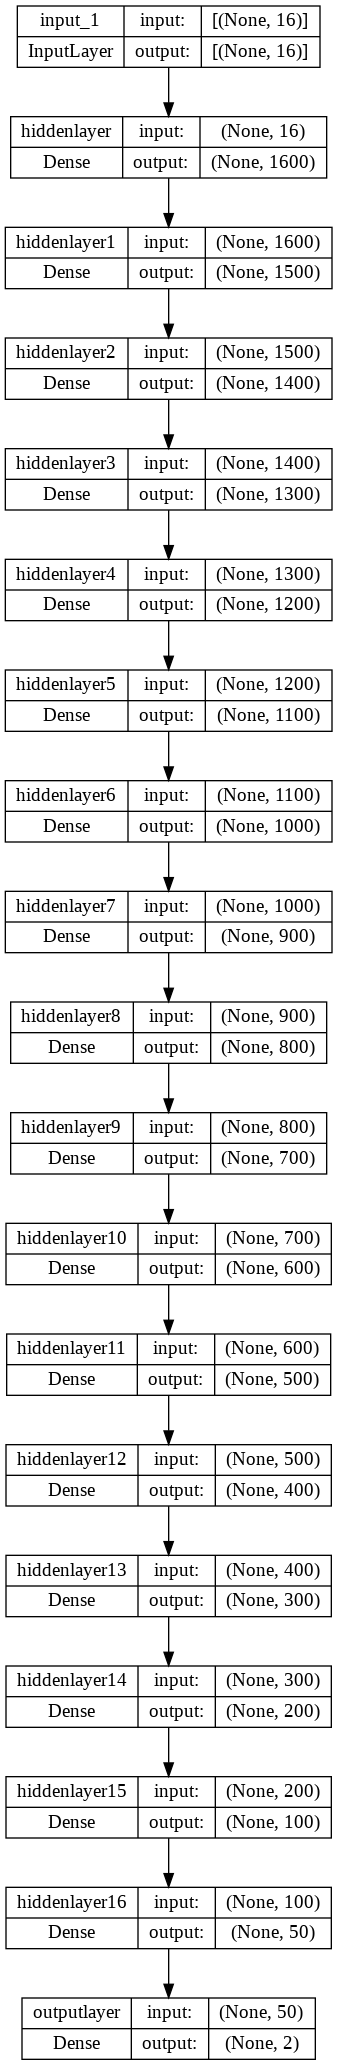

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

In [ ]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model_training = model.fit(x=X_train_normal_resmotom, y= y_res_lanel, batch_size=32, validation_data=(X_valid, y_valid), verbose=1, callbacks=[callback], epochs=150)

Epoch 1/150
4453/4453 [==============================] - 33s 7ms/step - loss: 0.4742 - accuracy: 0.7548 - val_loss: 0.4516 - val_accuracy: 0.7761
Epoch 2/150
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4442 - accuracy: 0.7769 - val_loss: 0.4302 - val_accuracy: 0.7841
Epoch 3/150
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4401 - accuracy: 0.7801 - val_loss: 0.4298 - val_accuracy: 0.7843
Epoch 4/150
4453/4453 [==============================] - 30s 7ms/step - loss: 0.4388 - accuracy: 0.7808 - val_loss: 0.4423 - val_accuracy: 0.7752
Epoch 5/150
4453/4453 [==============================] - 30s 7ms/step - loss: 0.4355 - accuracy: 0.7815 - val_loss: 0.4333 - val_accuracy: 0.7837
Epoch 6/150
4453/4453 [==============================] - 30s 7ms/step - loss: 0.4347 - accuracy: 0.7817 - val_loss: 0.4284 - val_accuracy: 0.7841
Epoch 7/150
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4346 - accuracy: 0.7819 - val_loss: 0.4323 -

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,0.474228,0.754822,0.451574,0.776112
1,0.444217,0.776931,0.430227,0.784056
2,0.440088,0.780110,0.429802,0.784337
3,0.438755,0.780840,0.442294,0.775242
4,0.435507,0.781535,0.433255,0.783691
5,0.434730,0.781718,0.428433,0.784140
6,0.434557,0.781949,0.432281,0.780126
7,0.434008,0.782988,0.429545,0.782933
8,0.432729,0.782883,0.427239,0.787425
9,0.433011,0.783079,0.437313,0.780997


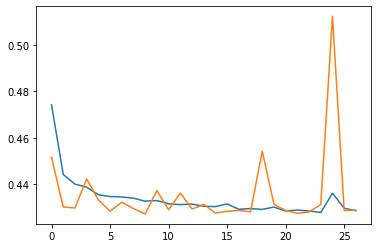

In [ ]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

In [ ]:
# Predection
pred = model.predict(x_test).argmax(axis=-1)
pred

1392/1392 [==============================] - 3s 2ms/step


array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
# Evaluation
model.evaluate(x_test, y_test)

1392/1392 [==============================] - 5s 3ms/step - loss: 0.4713 - accuracy: 0.7560


[0.47130945324897766, 0.7559677362442017]

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, pred))

[[27769  1983]
 [ 8884  5895]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84     29752
           1       0.75      0.40      0.52     14779

    accuracy                           0.76     44531
   macro avg       0.75      0.67      0.68     44531
weighted avg       0.75      0.76      0.73     44531



### Transfer learning

In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [ ]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model_training2 = loaded_model.fit(x=X_train_normal_resmotom, y= y_res_lanel, batch_size=32, validation_data=(X_valid, y_valid), verbose=1, callbacks=[callback], epochs=150)

Epoch 1/150
4453/4453 [==============================] - 30s 7ms/step - loss: 0.4275 - accuracy: 0.7864 - val_loss: 0.6576 - val_accuracy: 0.7844
Epoch 2/150
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4290 - accuracy: 0.7863 - val_loss: 0.4290 - val_accuracy: 0.7848
Epoch 3/150
4453/4453 [==============================] - 31s 7ms/step - loss: 0.4308 - accuracy: 0.7866 - val_loss: 0.4295 - val_accuracy: 0.7853
Epoch 4/150
4453/4453 [==============================] - 29s 7ms/step - loss: 3.7168 - accuracy: 0.7855 - val_loss: 0.4564 - val_accuracy: 0.7850


In [ ]:
# History
pd.DataFrame(model_training2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.427463,0.786371,0.657550,0.784393
1,0.428991,0.786273,0.428986,0.784814
2,0.430847,0.786603,0.429510,0.785319
3,3.716782,0.785494,0.456443,0.785039


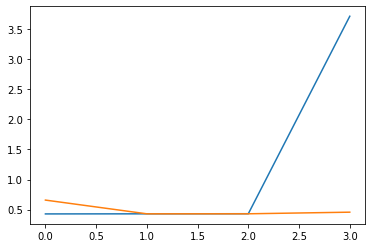

In [ ]:
# Plot the Losses
plt.plot(model_training2.history['loss'])
plt.plot(model_training2.history['val_loss'])

In [ ]:
# Predection
pred = loaded_model.predict(X_test).argmax(axis=-1)
pred

1392/1392 [==============================] - 3s 2ms/step


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
# Evaluation
loaded_model.evaluate(X_test, y_test)

1392/1392 [==============================] - 4s 3ms/step - loss: 0.4458 - accuracy: 0.7836


[0.445779949426651, 0.7836114168167114]

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, pred))

[[25221  4531]
 [ 5105  9674]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     29752
           1       0.68      0.65      0.67     14779

    accuracy                           0.78     44531
   macro avg       0.76      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531



In [ ]:
# serialize model to JSON
model_json_tomik = loaded_model.to_json()
with open("loaded_model_tomik.json", "w") as json_file:
    json_file.write(model_json_tomik)

In [ ]:
# serialize weights to HDF5
loaded_model.save_weights("loaded_model_tomik.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create loaded_model
json_file1 = open('loaded_model_tomik.json', 'r')
loaded_model_json1 = json_file1.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_json1)

In [ ]:
# load weights into new model
loaded_model2.load_weights("loaded_model_tomik.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model2.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model_training3 = loaded_model2.fit(x=X_train_normal_resmotom, y= y_res_lanel, batch_size=32, validation_data=(X_valid, y_valid), verbose=1, epochs=50)

Epoch 1/50
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4252 - accuracy: 0.7871 - val_loss: 0.5193 - val_accuracy: 0.7836
Epoch 2/50
4453/4453 [==============================] - 29s 6ms/step - loss: 0.4263 - accuracy: 0.7877 - val_loss: 0.4305 - val_accuracy: 0.7848
Epoch 3/50
4453/4453 [==============================] - 31s 7ms/step - loss: 0.4246 - accuracy: 0.7873 - val_loss: 0.4507 - val_accuracy: 0.7828
Epoch 4/50
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4262 - accuracy: 0.7877 - val_loss: 0.4322 - val_accuracy: 0.7829
Epoch 5/50
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4259 - accuracy: 0.7875 - val_loss: 1.2422 - val_accuracy: 0.7828
Epoch 6/50
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4506 - accuracy: 0.7881 - val_loss: 0.4337 - val_accuracy: 0.7823
Epoch 7/50
4453/4453 [==============================] - 29s 7ms/step - loss: 0.4247 - accuracy: 0.7880 - val_loss: 0.4319 - val_ac

In [ ]:
# History
pd.DataFrame(model_training3.history)

,loss,accuracy,val_loss,val_accuracy
0,0.425249,0.787115,0.519340,0.783635
1,0.426293,0.787740,0.430477,0.784842
2,0.424625,0.787269,0.450746,0.782765
3,0.426225,0.787719,0.432201,0.782877
4,0.425903,0.787466,1.242175,0.782849
5,0.450554,0.788091,0.433714,0.782260
6,0.424738,0.787985,0.431857,0.783972
7,0.423476,0.787824,1.365312,0.783523
8,0.425073,0.787705,0.863431,0.782260
9,0.425263,0.789326,1.863851,0.782596


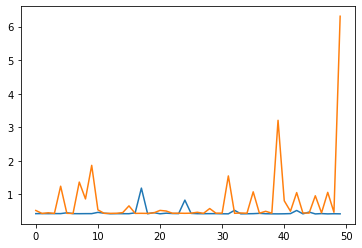

In [ ]:
# Plot the Losses
plt.plot(model_training3.history['loss'])
plt.plot(model_training3.history['val_loss'])

In [ ]:
# Predection
predd = loaded_model2.predict(X_test).argmax(axis=-1)
predd

1392/1392 [==============================] - 3s 2ms/step


array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
# Evaluation
loaded_model2.evaluate(X_test, y_test)

1392/1392 [==============================] - 4s 3ms/step - loss: 5.5755 - accuracy: 0.7811


[5.575527191162109, 0.7810513973236084]

In [ ]:
# Here we have printed confusion matrix for the classifier.
print(confusion_matrix(y_test, predd))

[[24824  4928]
 [ 4822  9957]]


In [ ]:
# Here we have printed classification report for the classifier.
print(classification_report(y_test, predd))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     29752
           1       0.67      0.67      0.67     14779

    accuracy                           0.78     44531
   macro avg       0.75      0.75      0.75     44531
weighted avg       0.78      0.78      0.78     44531

